### 3D Electric field of a system of charges

For a single charge in position $\vec{r'}$, the electric field $\vec{E}$ at a point $\vec{r}$ is:

$$
    \vec{E}(\vec{r}) = k q \, \frac{\vec{r} - \vec{r'}}{| \vec{r} - \vec{r'} | ^ \frac{3}{2}}
$$

For a system of many charges, the total electric field is just the sum of each electric field generated separately. It's the superposition principle.

In [1]:
# Importing libraries
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('dark_background') # Style

In [2]:
def plot_electric_field(T: tuple, charges: list, k: float = 1, normalize: bool = True):

    """
    Plot the electric field of N point charges in the 3D space.
    
    Parameters:
    T: tuple (t_ini, t_fin, n) defining the grid
    charges: list of tuples, each containing (q, (x, y, z)) for a charge
    k: Coulomb's constant (default 1)
    """
    
    # Creating the grid
    t_ini, t_fin, n = T
    t = np.linspace(t_ini, t_fin, n)
    X, Y, Z = np.meshgrid(t, t, t)
    
    # Initializing electric field components to zero
    Ex = np.zeros_like(X)
    Ey = np.zeros_like(Y)
    Ez = np.zeros_like(Z)
    
    # Calculating the total field
    for charge in charges:
        q, (x_prime, y_prime, z_prime) = charge
        
        # Distance from the charge to each point
        r = np.sqrt((X - x_prime) ** 2 + (Y - y_prime) ** 2 + (Z - z_prime) ** 2)
        r = np.where(r < 1e-05, 1e-05, r) # Avoid divisions by zero
        
        # Electric field contribution from this charge
        factor = (k * q) / (r ** 3)
        Ex += factor * (X - x_prime)
        Ey += factor * (Y - y_prime)
        Ez += factor * (Z - z_prime)

    # Ravel for plotting
    X = X.ravel()
    Y = Y.ravel()
    Z = Z.ravel()

    Ex = Ex.ravel()
    Ey = Ey.ravel()
    Ez = Ez.ravel()

    # Magnitude of each vector
    magnitude = np.sqrt(Ex ** 2 + Ey ** 2 + Ez ** 2).ravel()
    
    # Creating the plot
    fig = plt.figure(figsize = (8, 8))
    axis = fig.add_subplot(111, projection = '3d')

    norm = plt.Normalize(magnitude.min(), magnitude.max())
    colors = plt.cm.vanimo(norm(magnitude))
    
    axis.quiver(X, Y, Z, Ex, Ey, Ez,
                length = 0.25,
                arrow_length_ratio = 0.4,
                colors = colors,
                axlim_clip = True,
                normalize = normalize) # False: focus on the field's strength, True: focus on the field's shape
    
    # Adding the colorbar
    mappable = plt.cm.ScalarMappable(norm = norm, cmap = 'vanimo')
    mappable.set_array(magnitude)
    cbar = plt.colorbar(mappable, ax = axis, shrink = 0.6, pad = 0.1)
    cbar.set_label('Field Strength (a.u.)', rotation = 270, labelpad = 15)

    # Drawing the point charges
    for charge in charges:
        q, (x, y, z) = charge
        color = 'skyblue' if q > 0 else 'orange'
        axis.scatter(x, y, z,
                   c = color,
                   s = 100,
                   marker = 'o',
                   edgecolors = 'white')
    
    axis.set_xlabel('X (a.u.)')
    axis.set_ylabel('Y (a.u.)')
    axis.set_zlabel('Z (a.u.)')
    axis.set_title('Electric Field of Point Charges')
    axis.grid(False)

    # Unsetting filled walls
    axis.xaxis.pane.fill = False
    axis.yaxis.pane.fill = False
    axis.zaxis.pane.fill = False
    
    plt.show()
    return None

In [3]:
# Box with L = 6
T = (- 3, 3, 11)

# Setting q = 1
q = 1

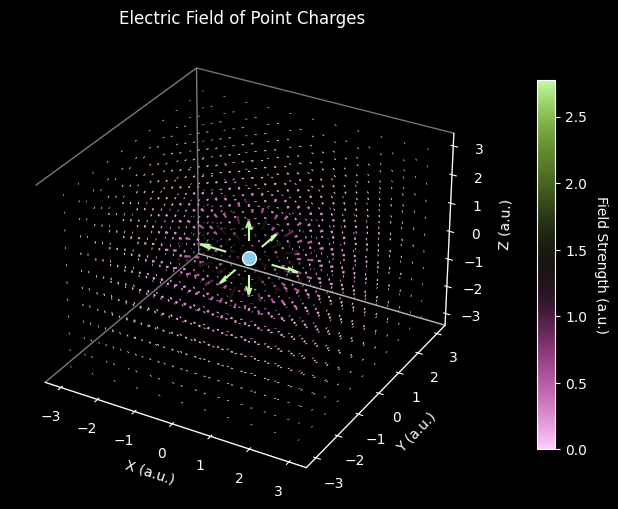

In [4]:
charges = [(q, (0, 0, 0))] # Only 1 positive charge at the origin

plot_electric_field(T, charges, normalize = False) # Focus on the strength

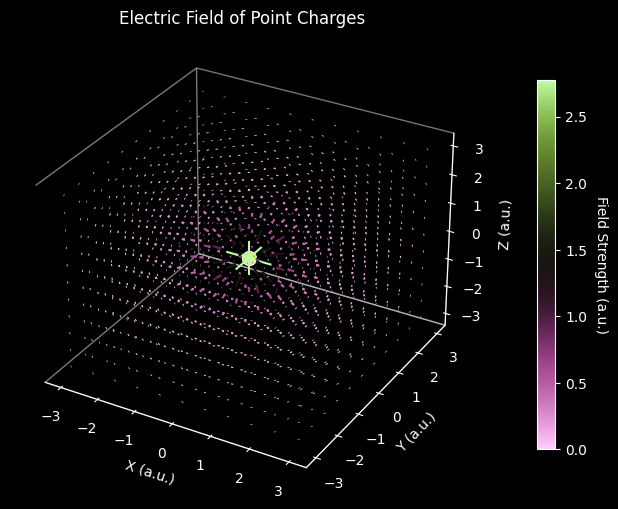

In [5]:
charges = [(- q, (0, 0, 0))] # Only 1 negative charge at the origin

plot_electric_field(T, charges, normalize = False) # Focus on the strength

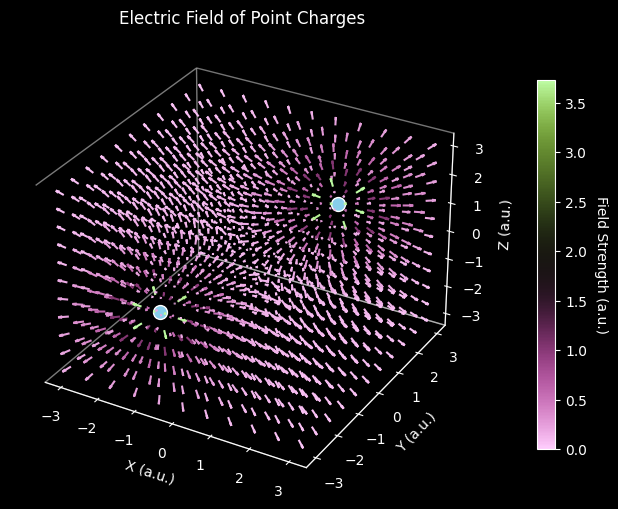

In [6]:
charges = [(q, (1.5, 1.5, 1.5)),
           (q, (- 1.5, - 1.5, - 1.5))] # 2 positive charges 

plot_electric_field(T, charges) # Focus on the shape

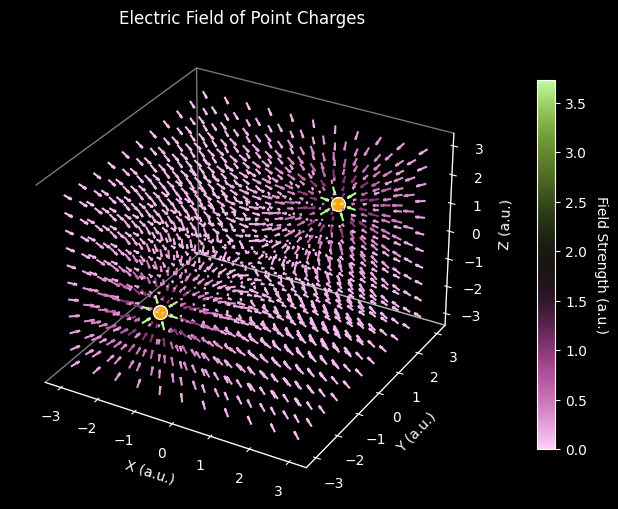

In [7]:
charges = [(- q, (1.5, 1.5, 1.5)),
           (- q, (- 1.5, - 1.5, - 1.5))] # 2 negative charges

plot_electric_field(T, charges)

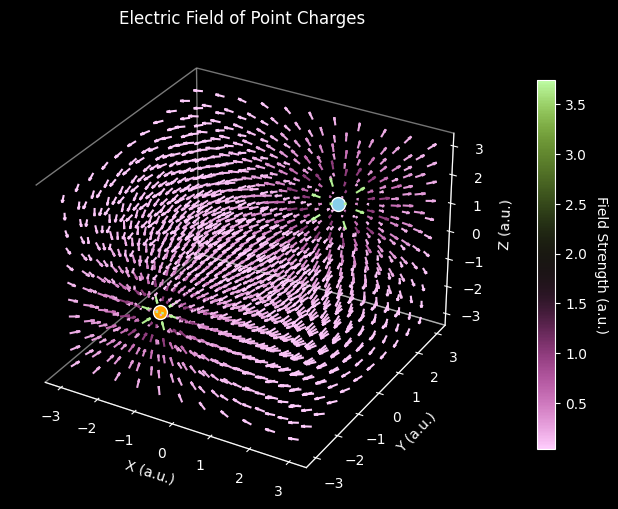

In [8]:
charges = [(q, (1.5, 1.5, 1.5)),
           (- q, (- 1.5, - 1.5, - 1.5))] # Simple electric dipole

plot_electric_field(T, charges)

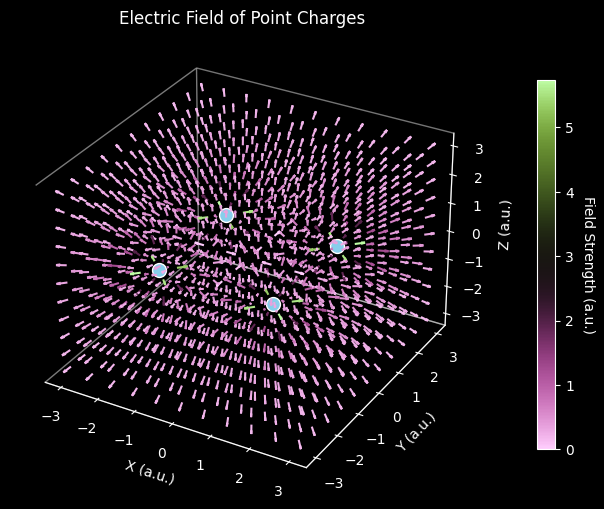

In [9]:
charges = [(q, (1.5, 1.5, 0)),
           (q, (- 1.5, - 1.5, 0)),
           (q, (1.5, - 1.5, 0)),
           (q, (- 1.5, 1.5, 0))] # Quadrupole with positive charges

plot_electric_field(T, charges)

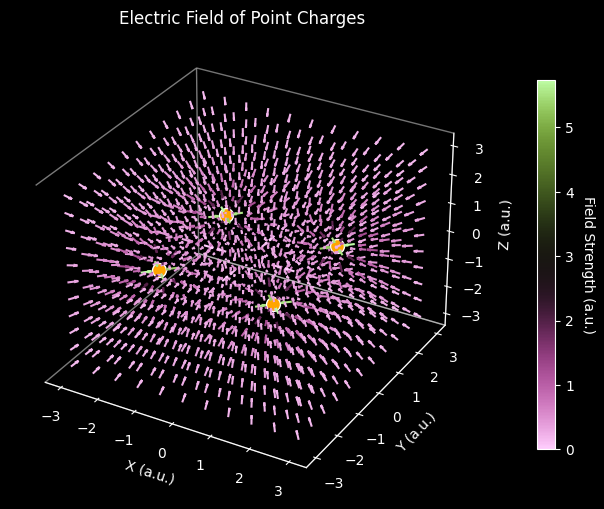

In [10]:
charges = [(- q, (1.5, 1.5, 0)),
           (- q, (- 1.5, - 1.5, 0)),
           (- q, (1.5, - 1.5, 0)),
           (- q, (- 1.5, 1.5, 0))] # Quadrupole with negative charges

plot_electric_field(T, charges)

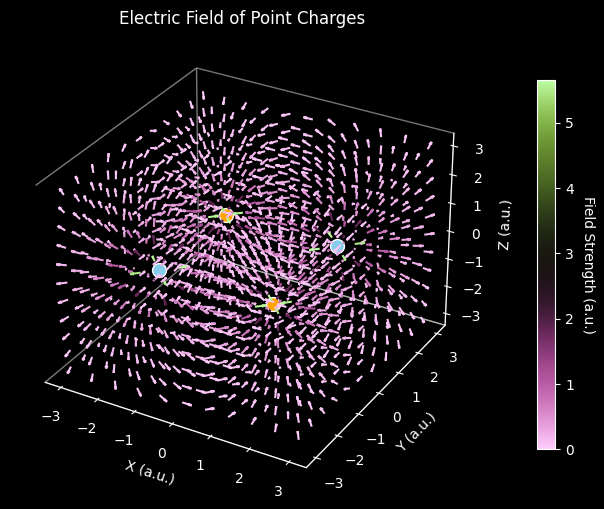

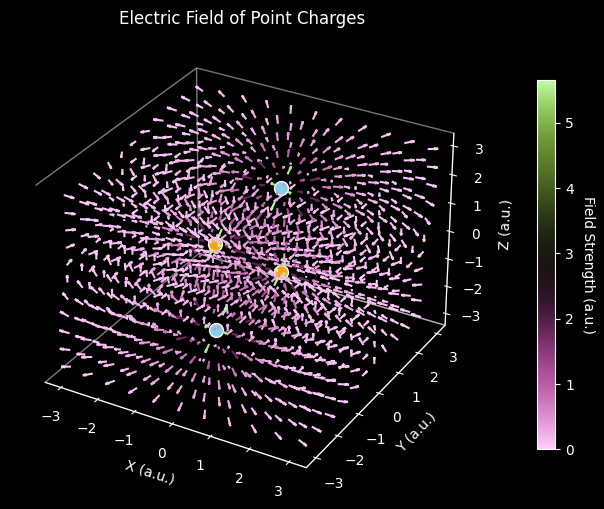

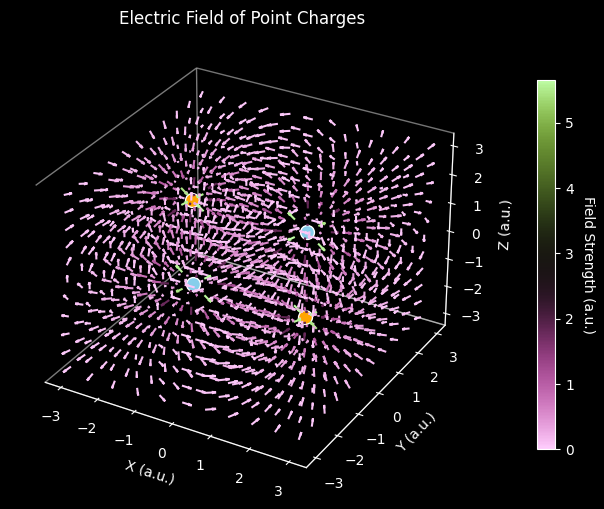

In [11]:
charges = [(q, (1.5, 1.5, 0)),
           (q, (- 1.5, - 1.5, 0)),
           (- q, (1.5, - 1.5, 0)),
           (- q, (- 1.5, 1.5, 0))] # Quadrupole with both charges
plot_electric_field(T, charges)

charges = [(q, (0, 1.5, 1.5)),
           (q, (0, - 1.5, -1.5)),
           (- q, (0, - 1.5, 1.5)),
           (- q, (0, 1.5, - 1.5))]
plot_electric_field(T, charges)

charges = [(q, (1.5, 0, 1.5)),
           (q, (- 1.5, 0, -1.5)),
           (- q, (- 1.5, 0, 1.5)),
           (- q, (1.5, 0, - 1.5))]
plot_electric_field(T, charges)